# <center> CISC 867 - Deep Learning: Project 2 </center>

## **Importing Fashion MNIST Dataset**

In [67]:
# importing the needed libraries
from numpy import mean
from numpy import std
import numpy as np
import seaborn as sns
from matplotlib import pyplot
from sklearn.model_selection import KFold
import tensorflow as tf
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,AveragePooling2D
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD,Adam,RMSprop

4431872/4422102 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


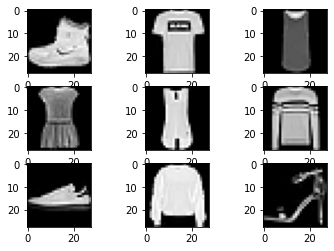

In [2]:
# Loading the fashion mnist dataset
from matplotlib import pyplot
from keras.datasets import fashion_mnist
# load dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [80]:
# load train and test dataset
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
# one hot encode target values
trainY = to_categorical(trainy)
testY = to_categorical(testy)


In [81]:
# scale pixels
# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0


## **Model 1:**

For the first model, we would use *Adam* optimizer with its default learning rate(0.001) and a batch size of 32

In [78]:
# Here we construct the LeNet-5 model which has 7 layers
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='tanh', input_shape=(28,28,1)))
model.add(AveragePooling2D())
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='tanh'))
model.add(AveragePooling2D())
model.add(Flatten())
model.add(Dense(units=128, activation='tanh'))
model.add(Dense(units=10, activation = 'softmax'))
model.compile(Adam(),
            loss='categorical_crossentropy',
            metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss',mode="min",patience=5)
#summary of LeNet-5 Model and number of params in each of the 7 layers
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 26, 26, 6)         60        
                                                                 
 average_pooling2d_22 (Avera  (None, 13, 13, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_27 (Conv2D)          (None, 11, 11, 16)        880       
                                                                 
 average_pooling2d_23 (Avera  (None, 5, 5, 16)         0         
 gePooling2D)                                                    
                                                                 
 flatten_11 (Flatten)        (None, 400)               0         
                                                                 
 dense_24 (Dense)            (None, 128)             

In [82]:
# evaluate a model using k-fold cross-validation
scores, histories = list(), list()
# prepare cross validation
kfold = KFold(5, shuffle=True, random_state=1)
# enumerate splits
for train_ix, test_ix in kfold.split(train_norm):
    # select rows for train and test
    train_X, train_Y, val_X, val_Y = train_norm[train_ix], trainY[train_ix], train_norm[test_ix], trainY[test_ix]
    # fit model
    history = model.fit(train_X, train_Y, epochs=10, batch_size=32, validation_data=(val_X, val_Y), callbacks=[early_stopping], verbose=2)
    # evaluate model
    _, acc = model.evaluate(test_norm, testY, verbose=2)
    print('> %.3f' % (acc * 100.0))
    # append scores
    scores.append(acc)
    histories.append(history)

Epoch 1/10
1500/1500 - 20s - loss: 0.3216 - accuracy: 0.8813 - val_loss: 0.3396 - val_accuracy: 0.8764 - 20s/epoch - 14ms/step
Epoch 2/10
1500/1500 - 20s - loss: 0.3042 - accuracy: 0.8869 - val_loss: 0.3399 - val_accuracy: 0.8721 - 20s/epoch - 13ms/step
Epoch 3/10
1500/1500 - 20s - loss: 0.2871 - accuracy: 0.8936 - val_loss: 0.3173 - val_accuracy: 0.8813 - 20s/epoch - 13ms/step
Epoch 4/10
1500/1500 - 20s - loss: 0.2761 - accuracy: 0.8966 - val_loss: 0.3114 - val_accuracy: 0.8867 - 20s/epoch - 13ms/step
Epoch 5/10
1500/1500 - 19s - loss: 0.2628 - accuracy: 0.9022 - val_loss: 0.3110 - val_accuracy: 0.8828 - 19s/epoch - 13ms/step
Epoch 6/10
1500/1500 - 20s - loss: 0.2526 - accuracy: 0.9054 - val_loss: 0.3015 - val_accuracy: 0.8867 - 20s/epoch - 13ms/step
Epoch 7/10
1500/1500 - 19s - loss: 0.2435 - accuracy: 0.9085 - val_loss: 0.3074 - val_accuracy: 0.8895 - 19s/epoch - 13ms/step
Epoch 8/10
1500/1500 - 20s - loss: 0.2325 - accuracy: 0.9137 - val_loss: 0.3114 - val_accuracy: 0.8886 - 20s/ep

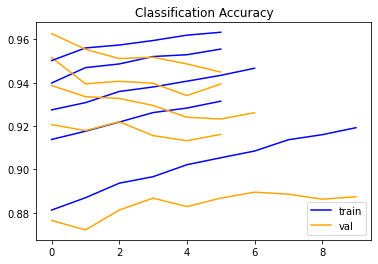

In [83]:
# plot diagnostic learning curves
val_acc = []
for i in range(len(histories)):
    pyplot.title('Classification Accuracy')
    pyplot.plot(histories[i].history['accuracy'], color='blue', label='train'if i == 0 else "")
    pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='val'if i == 0 else "")
    val_acc.append(histories[i].history['val_accuracy'])
pyplot.legend(loc="lower right")
pyplot.show()


In [84]:
avg_val_acc=0
for i in range(len(val_acc)):
  avg_val_acc+=np.mean(val_acc[i])
avg_val_acc/= 5
print(avg_val_acc)

0.9248717481181735


The first model achieved an avg validation accuracy of **92.5%**

Accuracy: mean=88.706 std=0.293, n=5


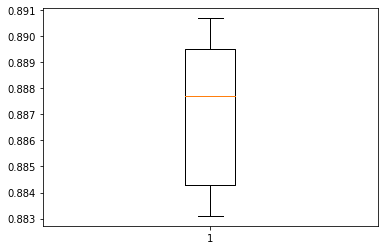

In [85]:
# summarize model performance
    # print summary
print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
# box and whisker plots of results
pyplot.boxplot(scores)
pyplot.show()

*The first model achieved an accuracy of **88.7%** on the test dataset*

## **Model 2:**

For the second model, we would keep using the Adam optimizer but with a batch size of 16 

In [30]:
# define cnn model
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='tanh', input_shape=(28,28,1)))
model.add(AveragePooling2D())
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='tanh'))
model.add(AveragePooling2D())
model.add(Flatten())
model.add(Dense(units=128, activation='tanh'))
model.add(Dense(units=10, activation = 'softmax'))
model.compile(Adam(),
            loss='categorical_crossentropy',
            metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss',mode="min",patience=5)

In [31]:
# evaluate a model using k-fold cross-validation
scores, histories = list(), list()
# prepare cross validation
kfold = KFold(5, shuffle=True, random_state=1)
# enumerate splits
for train_ix, test_ix in kfold.split(train_norm):
    # define model
    # select rows for train and test
    train_X, train_Y, val_X, val_Y = train_norm[train_ix], trainY[train_ix], train_norm[test_ix], trainY[test_ix]
    # fit model
    history = model.fit(train_X, train_Y, epochs=10, batch_size=16, validation_data=(val_X, val_Y), callbacks=[early_stopping], verbose=2)
    # evaluate model
    _, acc = model.evaluate(test_norm, testY, verbose=2)
    print('> %.3f' % (acc * 100.0))
    # append scores
    scores.append(acc)
    histories.append(history)

Epoch 1/10
3000/3000 - 27s - loss: 0.5676 - accuracy: 0.7921 - val_loss: 0.4566 - val_accuracy: 0.8304 - 27s/epoch - 9ms/step
Epoch 2/10
3000/3000 - 26s - loss: 0.4199 - accuracy: 0.8474 - val_loss: 0.4087 - val_accuracy: 0.8503 - 26s/epoch - 9ms/step
Epoch 3/10
3000/3000 - 26s - loss: 0.3717 - accuracy: 0.8640 - val_loss: 0.3960 - val_accuracy: 0.8508 - 26s/epoch - 9ms/step
Epoch 4/10
3000/3000 - 26s - loss: 0.3408 - accuracy: 0.8744 - val_loss: 0.3445 - val_accuracy: 0.8696 - 26s/epoch - 9ms/step
Epoch 5/10
3000/3000 - 26s - loss: 0.3169 - accuracy: 0.8838 - val_loss: 0.3397 - val_accuracy: 0.8723 - 26s/epoch - 9ms/step
Epoch 6/10
3000/3000 - 26s - loss: 0.2986 - accuracy: 0.8895 - val_loss: 0.3158 - val_accuracy: 0.8842 - 26s/epoch - 9ms/step
Epoch 7/10
3000/3000 - 26s - loss: 0.2798 - accuracy: 0.8965 - val_loss: 0.3437 - val_accuracy: 0.8750 - 26s/epoch - 9ms/step
Epoch 8/10
3000/3000 - 27s - loss: 0.2667 - accuracy: 0.9005 - val_loss: 0.3211 - val_accuracy: 0.8828 - 27s/epoch - 9

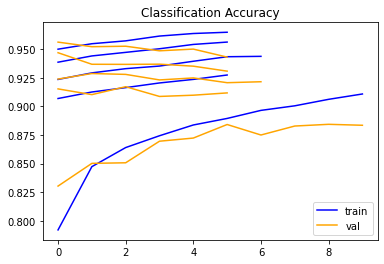

In [32]:
# plot diagnostic learning curves
val_acc = []
for i in range(len(histories)):
    pyplot.title('Classification Accuracy')
    pyplot.plot(histories[i].history['accuracy'], color='blue', label='train'if i == 0 else "")
    pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='val'if i == 0 else "")
    val_acc.append(histories[i].history['val_accuracy'])
pyplot.legend(loc="lower right")
pyplot.show()


In [33]:
avg_val_acc=0
for i in range(len(val_acc)):
  avg_val_acc+=np.mean(val_acc[i])
avg_val_acc/= 5
print(avg_val_acc)

0.9184653170335861


The second model achieved an avg validation accuracy of **91.8%**

Accuracy: mean=88.408 std=0.365, n=5


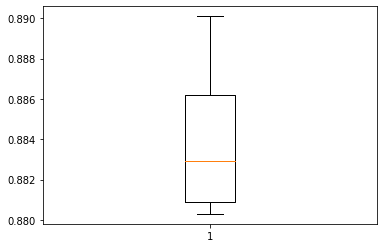

In [34]:
# summarize model performance
    # print summary
print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
# box and whisker plots of results
pyplot.boxplot(scores)
pyplot.show()

The second model achieved an accuracy of **88.4%** on the test dataset, which is a similar result to the previous model but slightly worse

## **Model 3:**

For the third model, we would stick with the Adam optimizer but with a batch size of 64

In [35]:
# define cnn model
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='tanh', input_shape=(28,28,1)))
model.add(AveragePooling2D())
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='tanh'))
model.add(AveragePooling2D())
model.add(Flatten())
model.add(Dense(units=128, activation='tanh'))
model.add(Dense(units=10, activation = 'softmax'))
model.compile(Adam(),
            loss='categorical_crossentropy',
            metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss',mode="min",patience=5)

In [36]:
# evaluate a model using k-fold cross-validation
scores, histories = list(), list()
# prepare cross validation
kfold = KFold(5, shuffle=True, random_state=1)
# enumerate splits
for train_ix, test_ix in kfold.split(train_norm):
    # define model
    # select rows for train and test
    train_X, train_Y, val_X, val_Y = train_norm[train_ix], trainY[train_ix], train_norm[test_ix], trainY[test_ix]
    # fit model
    history = model.fit(train_X, train_Y, epochs=10, batch_size=64, validation_data=(val_X, val_Y), callbacks=[early_stopping], verbose=2)
    # evaluate model
    _, acc = model.evaluate(test_norm, testY, verbose=2)
    print('> %.3f' % (acc * 100.0))
    # append scores
    scores.append(acc)
    histories.append(history)

Epoch 1/10
750/750 - 17s - loss: 0.6352 - accuracy: 0.7676 - val_loss: 0.5173 - val_accuracy: 0.8043 - 17s/epoch - 23ms/step
Epoch 2/10
750/750 - 16s - loss: 0.4680 - accuracy: 0.8295 - val_loss: 0.4693 - val_accuracy: 0.8192 - 16s/epoch - 21ms/step
Epoch 3/10
750/750 - 16s - loss: 0.4178 - accuracy: 0.8498 - val_loss: 0.3958 - val_accuracy: 0.8577 - 16s/epoch - 21ms/step
Epoch 4/10
750/750 - 16s - loss: 0.3845 - accuracy: 0.8594 - val_loss: 0.3799 - val_accuracy: 0.8616 - 16s/epoch - 21ms/step
Epoch 5/10
750/750 - 16s - loss: 0.3590 - accuracy: 0.8700 - val_loss: 0.3619 - val_accuracy: 0.8695 - 16s/epoch - 21ms/step
Epoch 6/10
750/750 - 16s - loss: 0.3390 - accuracy: 0.8764 - val_loss: 0.3501 - val_accuracy: 0.8723 - 16s/epoch - 22ms/step
Epoch 7/10
750/750 - 16s - loss: 0.3230 - accuracy: 0.8825 - val_loss: 0.3450 - val_accuracy: 0.8723 - 16s/epoch - 22ms/step
Epoch 8/10
750/750 - 16s - loss: 0.3068 - accuracy: 0.8872 - val_loss: 0.3287 - val_accuracy: 0.8762 - 16s/epoch - 21ms/step


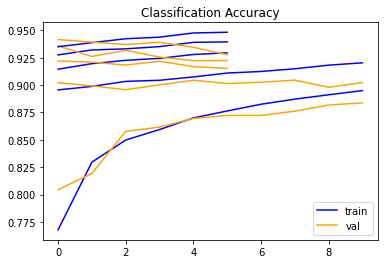

In [37]:
# plot diagnostic learning curves
val_acc = []
for i in range(len(histories)):
    pyplot.title('Classification Accuracy')
    pyplot.plot(histories[i].history['accuracy'], color='blue', label='train'if i == 0 else "")
    pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='val'if i == 0 else "")
    val_acc.append(histories[i].history['val_accuracy'])
pyplot.legend(loc="lower right")
pyplot.show()


In [38]:
avg_val_acc=0
for i in range(len(val_acc)):
  avg_val_acc+=np.mean(val_acc[i])
avg_val_acc/= 5
print(avg_val_acc)

0.9088522231578826


The third model achieved an avg validation accuracy of **90.8%**

Accuracy: mean=88.344 std=0.298, n=5


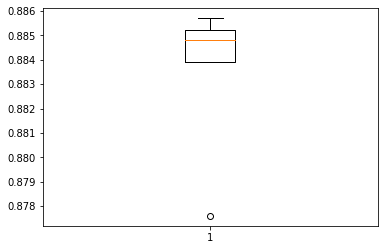

In [39]:
# summarize model performance
    # print summary
print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
# box and whisker plots of results
pyplot.boxplot(scores)
pyplot.show()

The third model achieved an accuracy of **88.3%** on the test dataset, which is still not better than the default 32 batch size

## **Model 4:**

Here we would use *SGD* optimizer with its default learning rate and a batch size of 32, since it worked best in the previous models.

In [42]:
# define cnn model
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='tanh', input_shape=(28,28,1)))
model.add(AveragePooling2D())
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='tanh'))
model.add(AveragePooling2D())
model.add(Flatten())
model.add(Dense(units=128, activation='tanh'))
model.add(Dense(units=10, activation = 'softmax'))
model.compile(SGD(),
            loss='categorical_crossentropy',
            metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss',mode="min",patience=5)

In [43]:
# evaluate a model using k-fold cross-validation
scores, histories = list(), list()
# prepare cross validation
kfold = KFold(5, shuffle=True, random_state=1)
# enumerate splits
for train_ix, test_ix in kfold.split(train_norm):
    # define model
    # select rows for train and test
    train_X, train_Y, val_X, val_Y = train_norm[train_ix], trainY[train_ix], train_norm[test_ix], trainY[test_ix]
    # fit model
    history = model.fit(train_X, train_Y, epochs=10, batch_size=32, validation_data=(val_X, val_Y), callbacks=[early_stopping], verbose=2)
    # evaluate model
    _, acc = model.evaluate(test_norm, testY, verbose=2)
    print('> %.3f' % (acc * 100.0))
    # append scores
    scores.append(acc)
    histories.append(history)

Epoch 1/10
1500/1500 - 23s - loss: 0.9397 - accuracy: 0.6802 - val_loss: 0.6753 - val_accuracy: 0.7459 - 23s/epoch - 15ms/step
Epoch 2/10
1500/1500 - 18s - loss: 0.6268 - accuracy: 0.7682 - val_loss: 0.5896 - val_accuracy: 0.7822 - 18s/epoch - 12ms/step
Epoch 3/10
1500/1500 - 18s - loss: 0.5661 - accuracy: 0.7909 - val_loss: 0.5451 - val_accuracy: 0.8027 - 18s/epoch - 12ms/step
Epoch 4/10
1500/1500 - 19s - loss: 0.5311 - accuracy: 0.8042 - val_loss: 0.5191 - val_accuracy: 0.8089 - 19s/epoch - 12ms/step
Epoch 5/10
1500/1500 - 18s - loss: 0.5066 - accuracy: 0.8135 - val_loss: 0.5055 - val_accuracy: 0.8129 - 18s/epoch - 12ms/step
Epoch 6/10
1500/1500 - 19s - loss: 0.4867 - accuracy: 0.8225 - val_loss: 0.4803 - val_accuracy: 0.8252 - 19s/epoch - 13ms/step
Epoch 7/10
1500/1500 - 19s - loss: 0.4704 - accuracy: 0.8287 - val_loss: 0.4645 - val_accuracy: 0.8324 - 19s/epoch - 13ms/step
Epoch 8/10
1500/1500 - 19s - loss: 0.4558 - accuracy: 0.8343 - val_loss: 0.4556 - val_accuracy: 0.8337 - 19s/ep

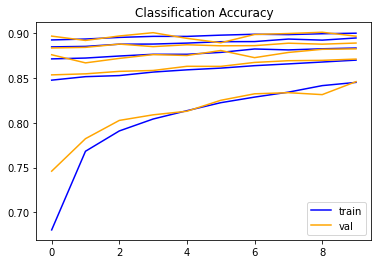

In [44]:
# plot diagnostic learning curves
val_acc = []
for i in range(len(histories)):
    pyplot.title('Classification Accuracy')
    pyplot.plot(histories[i].history['accuracy'], color='blue', label='train'if i == 0 else "")
    pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='val'if i == 0 else "")
    val_acc.append(histories[i].history['val_accuracy'])
pyplot.legend(loc="lower right")
pyplot.show()


In [45]:
avg_val_acc=0
for i in range(len(val_acc)):
  avg_val_acc+=np.mean(val_acc[i])
avg_val_acc/= 5
print(avg_val_acc)

0.8669600009918212


The fourth model achieved an avg validation accuracy of **86.6%**

Accuracy: mean=86.464 std=1.729, n=5


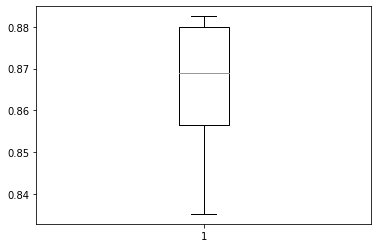

In [46]:
# summarize model performance
    # print summary
print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
# box and whisker plots of results
pyplot.boxplot(scores)
pyplot.show()

The fourth model achieved an accuracy of **86.5
%** on the test dataset, which is not better as compared to the Adam optimizer

## **Model 5:**

Here we use *RMSProp* optimizer with its default learning rate and a batch size of 32

In [47]:
# define cnn model
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='tanh', input_shape=(28,28,1)))
model.add(AveragePooling2D())
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='tanh'))
model.add(AveragePooling2D())
model.add(Flatten())
model.add(Dense(units=128, activation='tanh'))
model.add(Dense(units=10, activation = 'softmax'))
model.compile(RMSprop(),
            loss='categorical_crossentropy',
            metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss',mode="min",patience=5)

In [48]:
# evaluate a model using k-fold cross-validation
scores, histories = list(), list()
# prepare cross validation
kfold = KFold(5, shuffle=True, random_state=1)
# enumerate splits
for train_ix, test_ix in kfold.split(train_norm):
    # define model
    # select rows for train and test
    train_X, train_Y, val_X, val_Y = train_norm[train_ix], trainY[train_ix], train_norm[test_ix], trainY[test_ix]
    # fit model
    history = model.fit(train_X, train_Y, epochs=10, batch_size=32, validation_data=(val_X, val_Y), callbacks=[early_stopping], verbose=2)
    # evaluate model
    _, acc = model.evaluate(test_norm, testY, verbose=2)
    print('> %.3f' % (acc * 100.0))
    # append scores
    scores.append(acc)
    histories.append(history)

Epoch 1/10
1500/1500 - 21s - loss: 0.5942 - accuracy: 0.7801 - val_loss: 0.4813 - val_accuracy: 0.8245 - 21s/epoch - 14ms/step
Epoch 2/10
1500/1500 - 19s - loss: 0.4427 - accuracy: 0.8378 - val_loss: 0.4071 - val_accuracy: 0.8545 - 19s/epoch - 13ms/step
Epoch 3/10
1500/1500 - 19s - loss: 0.3913 - accuracy: 0.8569 - val_loss: 0.4026 - val_accuracy: 0.8516 - 19s/epoch - 13ms/step
Epoch 4/10
1500/1500 - 20s - loss: 0.3596 - accuracy: 0.8690 - val_loss: 0.3735 - val_accuracy: 0.8614 - 20s/epoch - 13ms/step
Epoch 5/10
1500/1500 - 19s - loss: 0.3378 - accuracy: 0.8767 - val_loss: 0.3504 - val_accuracy: 0.8704 - 19s/epoch - 13ms/step
Epoch 6/10
1500/1500 - 20s - loss: 0.3187 - accuracy: 0.8813 - val_loss: 0.3543 - val_accuracy: 0.8693 - 20s/epoch - 13ms/step
Epoch 7/10
1500/1500 - 19s - loss: 0.3048 - accuracy: 0.8881 - val_loss: 0.3259 - val_accuracy: 0.8794 - 19s/epoch - 13ms/step
Epoch 8/10
1500/1500 - 19s - loss: 0.2928 - accuracy: 0.8907 - val_loss: 0.3228 - val_accuracy: 0.8815 - 19s/ep

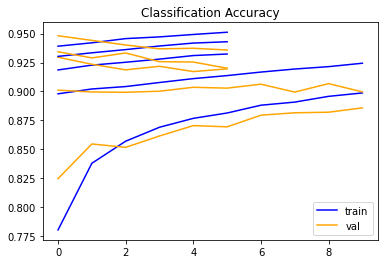

In [49]:
# plot diagnostic learning curves
val_acc = []
for i in range(len(histories)):
    pyplot.title('Classification Accuracy')
    pyplot.plot(histories[i].history['accuracy'], color='blue', label='train'if i == 0 else "")
    pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='val'if i == 0 else "")
    val_acc.append(histories[i].history['val_accuracy'])
pyplot.legend(loc="lower right")
pyplot.show()


In [50]:
avg_val_acc=0
for i in range(len(val_acc)):
  avg_val_acc+=np.mean(val_acc[i])
avg_val_acc/= 5
print(avg_val_acc)

0.911593334277471


The fifth model achieved an avg validation accuracy of **91.2%**

Accuracy: mean=88.560 std=0.374, n=5


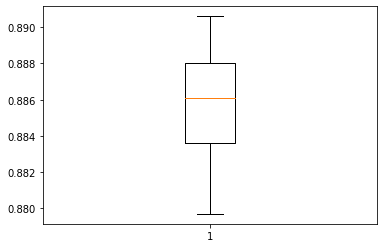

In [51]:
# summarize model performance
    # print summary
print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
# box and whisker plots of results
pyplot.boxplot(scores)
pyplot.show()

The fifth model achieved an accuracy of **88.6%** on the test dataset, which is almost as good as the *Adam* optimizer's score (88.7%)

## **Model 6:**

Since *Adam* optimizer achieved the best score, we are going to use it but change its learning rate to 0.01

In [52]:
# define cnn model
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='tanh', input_shape=(28,28,1)))
model.add(AveragePooling2D())
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='tanh'))
model.add(AveragePooling2D())
model.add(Flatten())
model.add(Dense(units=128, activation='tanh'))
model.add(Dense(units=10, activation = 'softmax'))
model.compile(Adam(learning_rate=0.01),
            loss='categorical_crossentropy',
            metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss',mode="min",patience=5)

In [53]:
# evaluate a model using k-fold cross-validation
scores, histories = list(), list()
# prepare cross validation
kfold = KFold(5, shuffle=True, random_state=1)
# enumerate splits
for train_ix, test_ix in kfold.split(train_norm):
    # define model
    # select rows for train and test
    train_X, train_Y, val_X, val_Y = train_norm[train_ix], trainY[train_ix], train_norm[test_ix], trainY[test_ix]
    # fit model
    history = model.fit(train_X, train_Y, epochs=10, batch_size=32, validation_data=(val_X, val_Y), callbacks=[early_stopping], verbose=2)
    # evaluate model
    _, acc = model.evaluate(test_norm, testY, verbose=2)
    print('> %.3f' % (acc * 100.0))
    # append scores
    scores.append(acc)
    histories.append(history)

Epoch 1/10
1500/1500 - 19s - loss: 0.5909 - accuracy: 0.7887 - val_loss: 0.5141 - val_accuracy: 0.8066 - 19s/epoch - 12ms/step
Epoch 2/10
1500/1500 - 19s - loss: 0.5515 - accuracy: 0.8043 - val_loss: 0.5297 - val_accuracy: 0.8117 - 19s/epoch - 13ms/step
Epoch 3/10
1500/1500 - 18s - loss: 0.5303 - accuracy: 0.8121 - val_loss: 0.5156 - val_accuracy: 0.8181 - 18s/epoch - 12ms/step
Epoch 4/10
1500/1500 - 18s - loss: 0.5368 - accuracy: 0.8109 - val_loss: 0.5531 - val_accuracy: 0.8091 - 18s/epoch - 12ms/step
Epoch 5/10
1500/1500 - 18s - loss: 0.5230 - accuracy: 0.8155 - val_loss: 0.5220 - val_accuracy: 0.8202 - 18s/epoch - 12ms/step
Epoch 6/10
1500/1500 - 18s - loss: 0.5083 - accuracy: 0.8209 - val_loss: 0.4929 - val_accuracy: 0.8150 - 18s/epoch - 12ms/step
Epoch 7/10
1500/1500 - 18s - loss: 0.5151 - accuracy: 0.8192 - val_loss: 0.5376 - val_accuracy: 0.8198 - 18s/epoch - 12ms/step
Epoch 8/10
1500/1500 - 18s - loss: 0.5078 - accuracy: 0.8222 - val_loss: 0.5071 - val_accuracy: 0.8193 - 18s/ep

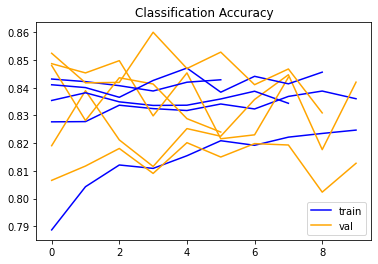

In [54]:
# plot diagnostic learning curves
val_acc = []
for i in range(len(histories)):
    pyplot.title('Classification Accuracy')
    pyplot.plot(histories[i].history['accuracy'], color='blue', label='train'if i == 0 else "")
    pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='val'if i == 0 else "")
    val_acc.append(histories[i].history['val_accuracy'])
pyplot.legend(loc="lower right")
pyplot.show()


In [55]:
avg_val_acc=0
for i in range(len(val_acc)):
  avg_val_acc+=np.mean(val_acc[i])
avg_val_acc/= 5
print(avg_val_acc)

0.8322947710752487


The sixth model achieved an avg validation accuracy of **83.2%**

Accuracy: mean=82.268 std=1.190, n=5


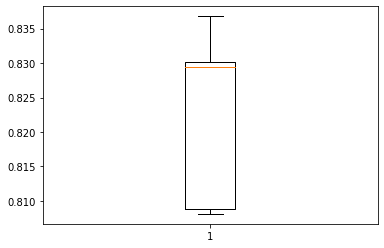

In [56]:
# summarize model performance
    # print summary
print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
# box and whisker plots of results
pyplot.boxplot(scores)
pyplot.show()

The sixth model achieved an accuracy of **82.3%** on the test dataset, which is way worse as compared to the score achieved while using the default learning rate of (0.001)

## **Model 7:**

Here we use *Adam* optimizer with a learning rate of 0.0001 and a batch size of 32

In [57]:
# define cnn model
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='tanh', input_shape=(28,28,1)))
model.add(AveragePooling2D())
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='tanh'))
model.add(AveragePooling2D())
model.add(Flatten())
model.add(Dense(units=128, activation='tanh'))
model.add(Dense(units=10, activation = 'softmax'))
model.compile(Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss',mode="min",patience=5)

In [58]:
# evaluate a model using k-fold cross-validation
scores, histories = list(), list()
# prepare cross validation
kfold = KFold(5, shuffle=True, random_state=1)
# enumerate splits
for train_ix, test_ix in kfold.split(train_norm):
    # define model
    # select rows for train and test
    train_X, train_Y, val_X, val_Y = train_norm[train_ix], trainY[train_ix], train_norm[test_ix], trainY[test_ix]
    # fit model
    history = model.fit(train_X, train_Y, epochs=10, batch_size=32, validation_data=(val_X, val_Y), callbacks=[early_stopping], verbose=2)
    # evaluate model
    _, acc = model.evaluate(test_norm, testY, verbose=2)
    print('> %.3f' % (acc * 100.0))
    # append scores
    scores.append(acc)
    histories.append(history)

Epoch 1/10
1500/1500 - 20s - loss: 0.9527 - accuracy: 0.6825 - val_loss: 0.6759 - val_accuracy: 0.7497 - 20s/epoch - 13ms/step
Epoch 2/10
1500/1500 - 19s - loss: 0.6315 - accuracy: 0.7657 - val_loss: 0.6024 - val_accuracy: 0.7724 - 19s/epoch - 12ms/step
Epoch 3/10
1500/1500 - 18s - loss: 0.5791 - accuracy: 0.7844 - val_loss: 0.5606 - val_accuracy: 0.7920 - 18s/epoch - 12ms/step
Epoch 4/10
1500/1500 - 18s - loss: 0.5460 - accuracy: 0.7971 - val_loss: 0.5321 - val_accuracy: 0.8036 - 18s/epoch - 12ms/step
Epoch 5/10
1500/1500 - 18s - loss: 0.5213 - accuracy: 0.8070 - val_loss: 0.5142 - val_accuracy: 0.8110 - 18s/epoch - 12ms/step
Epoch 6/10
1500/1500 - 19s - loss: 0.5007 - accuracy: 0.8157 - val_loss: 0.4971 - val_accuracy: 0.8138 - 19s/epoch - 13ms/step
Epoch 7/10
1500/1500 - 18s - loss: 0.4841 - accuracy: 0.8230 - val_loss: 0.4838 - val_accuracy: 0.8207 - 18s/epoch - 12ms/step
Epoch 8/10
1500/1500 - 18s - loss: 0.4702 - accuracy: 0.8274 - val_loss: 0.4653 - val_accuracy: 0.8270 - 18s/ep

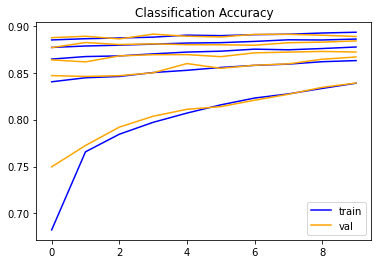

In [59]:
# plot diagnostic learning curves
val_acc = []
for i in range(len(histories)):
    pyplot.title('Classification Accuracy')
    pyplot.plot(histories[i].history['accuracy'], color='blue', label='train'if i == 0 else "")
    pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='val'if i == 0 else "")
    val_acc.append(histories[i].history['val_accuracy'])
pyplot.legend(loc="lower right")
pyplot.show()


In [60]:
avg_val_acc=0
for i in range(len(val_acc)):
  avg_val_acc+=np.mean(val_acc[i])
avg_val_acc/= 5
print(avg_val_acc)

0.8599933314323425


The seventh model achieved an avg validation accuracy of **86%**

Accuracy: mean=85.734 std=1.726, n=5


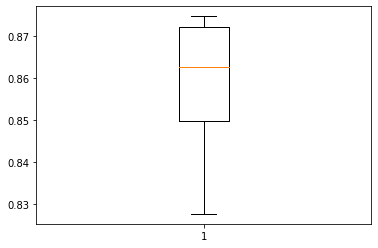

In [61]:
# summarize model performance
    # print summary
print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
# box and whisker plots of results
pyplot.boxplot(scores)
pyplot.show()

The seventh model achieved an accuracy of **85.7%** on the test dataset, which is still not better as compared to using the default learning rate

## **Best Model And Convergence Curve**

The best model was achieved using *Adam* optimizer with its default learning rate (0.001) and the default batch size of (32)

For the best model, we are going to plot the *Convergence Curve* for its validation loss

In [62]:
# define cnn model
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='tanh', input_shape=(28,28,1)))
model.add(AveragePooling2D())
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='tanh'))
model.add(AveragePooling2D())
model.add(Flatten())
model.add(Dense(units=128, activation='tanh'))
model.add(Dense(units=10, activation = 'softmax'))
model.compile(Adam(),
            loss='categorical_crossentropy',
            metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss',mode="min",patience=5)

In [63]:
history = model.fit(train_norm, trainY, epochs=15, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=2)

Epoch 1/15
1500/1500 - 20s - loss: 0.5944 - accuracy: 0.7801 - val_loss: 0.4784 - val_accuracy: 0.8239 - 20s/epoch - 13ms/step
Epoch 2/15
1500/1500 - 18s - loss: 0.4438 - accuracy: 0.8385 - val_loss: 0.4151 - val_accuracy: 0.8493 - 18s/epoch - 12ms/step
Epoch 3/15
1500/1500 - 19s - loss: 0.3929 - accuracy: 0.8566 - val_loss: 0.3780 - val_accuracy: 0.8612 - 19s/epoch - 12ms/step
Epoch 4/15
1500/1500 - 19s - loss: 0.3599 - accuracy: 0.8686 - val_loss: 0.3642 - val_accuracy: 0.8676 - 19s/epoch - 13ms/step
Epoch 5/15
1500/1500 - 19s - loss: 0.3350 - accuracy: 0.8775 - val_loss: 0.3606 - val_accuracy: 0.8668 - 19s/epoch - 13ms/step
Epoch 6/15
1500/1500 - 19s - loss: 0.3173 - accuracy: 0.8832 - val_loss: 0.3367 - val_accuracy: 0.8754 - 19s/epoch - 13ms/step
Epoch 7/15
1500/1500 - 19s - loss: 0.2993 - accuracy: 0.8886 - val_loss: 0.3325 - val_accuracy: 0.8779 - 19s/epoch - 13ms/step
Epoch 8/15
1500/1500 - 19s - loss: 0.2879 - accuracy: 0.8934 - val_loss: 0.3249 - val_accuracy: 0.8800 - 19s/ep

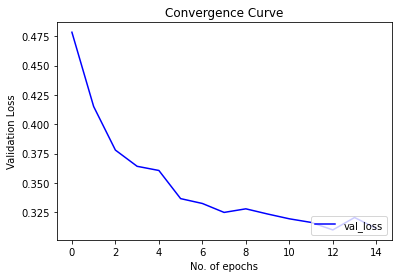

In [66]:
pyplot.title('Convergence Curve')
pyplot.plot(history.history['val_loss'], color='blue', label='val_loss')
pyplot.xlabel('No. of epochs')
pyplot.ylabel('Validation Loss')
pyplot.legend(loc="lower right")
pyplot.show()


# **Transfer Learning**

**We are going to use two transfer learning CNN's and compare their results to those achieved by our *LeNet-5* model**

## 1. **ResNet50**

In [74]:
import tensorflow as tf 
import numpy as np 

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# expand new axis, channel axis 
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# [optional]: we may need 3 channel (instead of 1)
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)

# it's always better to normalize 
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# resize the input shape , i.e. old shape: 28, new shape: 32
x_train = tf.image.resize(x_train, [32,32])
x_test = tf.image.resize(x_test, [32,32]) # if we want to resize 

# one hot 
y_train = tf.keras.utils.to_categorical(y_train , num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test , num_classes=10)

print(x_train.shape, y_train.shape)

(60000, 32, 32, 3) (60000, 10)


In [86]:
input = tf.keras.Input(shape=(32,32,3))
res_net = tf.keras.applications.ResNet50(weights='imagenet',
                                             include_top = False, 
                                             input_tensor = input)
# Now that we apply global max pooling.
max_pool = tf.keras.layers.GlobalMaxPooling2D()(res_net.output)

# Finally, we add a classification layer.
output = tf.keras.layers.Dense(10, activation='softmax', use_bias=True)(max_pool)

# bind all
model = tf.keras.Model(res_net.input, output)
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss',mode="min",patience=5)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                            

In [ ]:
history=model.fit(x_train, y_train, batch_size=16, epochs=10,callbacks=[early_stopping],validation_split=0.2,verbose = 2)

Since it would take a lot of time to train this model on Colab, we used Jupyter for this task and would record the acquired results to the report. 

## 2. **Xception**

In [75]:
import tensorflow as tf 
import numpy as np 

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# expand new axis, channel axis 
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# [optional]: we may need 3 channel (instead of 1)
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)

# it's always better to normalize 
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# resize the input shape , i.e. old shape: 28, new shape: 32
x_train = tf.image.resize(x_train, [72,72])
x_test = tf.image.resize(x_test, [72,72]) # if we want to resize 

# one hot 
y_train = tf.keras.utils.to_categorical(y_train , num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test , num_classes=10)

print(x_train.shape, y_train.shape)

(60000, 72, 72, 3) (60000, 10)


In [87]:
input = tf.keras.Input(shape=(72,72,3))
res_net = tf.keras.applications.Xception(weights='imagenet',
                                             include_top = False, 
                                             input_tensor = input)
# Now that we apply global max pooling.
max_pool = tf.keras.layers.GlobalMaxPooling2D()(res_net.output)

# Finally, we add a classification layer.
output = tf.keras.layers.Dense(10, activation='softmax', use_bias=True)(max_pool)

# bind all
model = tf.keras.Model(res_net.input, output)
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss',mode="min",patience=5)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 72, 72, 3)]  0           []                               
                                                                                                  
 block1_conv1 (Conv2D)          (None, 35, 35, 32)   864         ['input_4[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 35, 35, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                                  
 block1_conv1_act (Activation)  (None, 35, 35, 32)   0           ['block1_conv1_bn[0][0]']  

In [ ]:
history=model.fit(x_train, y_train, batch_size=16, epochs=10,callbacks=[early_stopping],validation_split=0.2,verbose = 2)

We would use jupyter here as well